In [73]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
df = pd.read_csv("dawum.de_Bundestag_2025-02-15.csv")

# Datum in datetime umwandeln und Jahr extrahieren
df["Datum"] = pd.to_datetime(df["Datum"], format="%d.%m.%Y")
df.set_index("Datum", inplace=True)

# NaN-Werte mit 0 ersetzen
df = df.fillna(0)

# Zahlen als float darstellen (mit ',' als Dezimaltrennzeichen)
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(",", ".").astype(float)
    
# Nur numerische Spalten extrahieren
df_avg_month_numerics = df.select_dtypes(include=[np.number])

# Sicherstellen, dass jede Zeile 100 % ergibt (normalisieren)
df = df_avg_month_numerics.div(df_avg_month_numerics.sum(axis=1), axis=0) * 100
df

,CDU/CSU,SPD,FDP,Grüne,Linke,AfD,Freie Wähler,BSW,Sonstige
Datum,,,,,,,,,
2016-01-06,38.5,23.5,5.0,10.0,9.0,8.5,0.0,0.0,5.5
2016-01-09,38.7,23.3,4.6,10.0,9.4,8.3,0.0,0.0,5.7
2016-01-13,38.6,23.3,4.7,10.0,9.5,8.7,0.0,0.0,5.2
2016-01-15,37.9,23.8,4.6,10.0,8.8,9.5,0.0,0.0,5.4
2016-01-16,37.7,24.0,4.8,10.0,8.6,9.7,0.0,0.0,5.2
...,...,...,...,...,...,...,...,...,...
2025-02-11,29.6,15.9,4.0,13.3,5.4,20.7,1.8,4.8,4.5
2025-02-12,29.5,15.7,4.0,13.5,5.4,20.5,1.8,4.7,4.9
2025-02-13,30.1,15.2,4.0,13.5,5.7,20.5,1.4,4.6,5.0


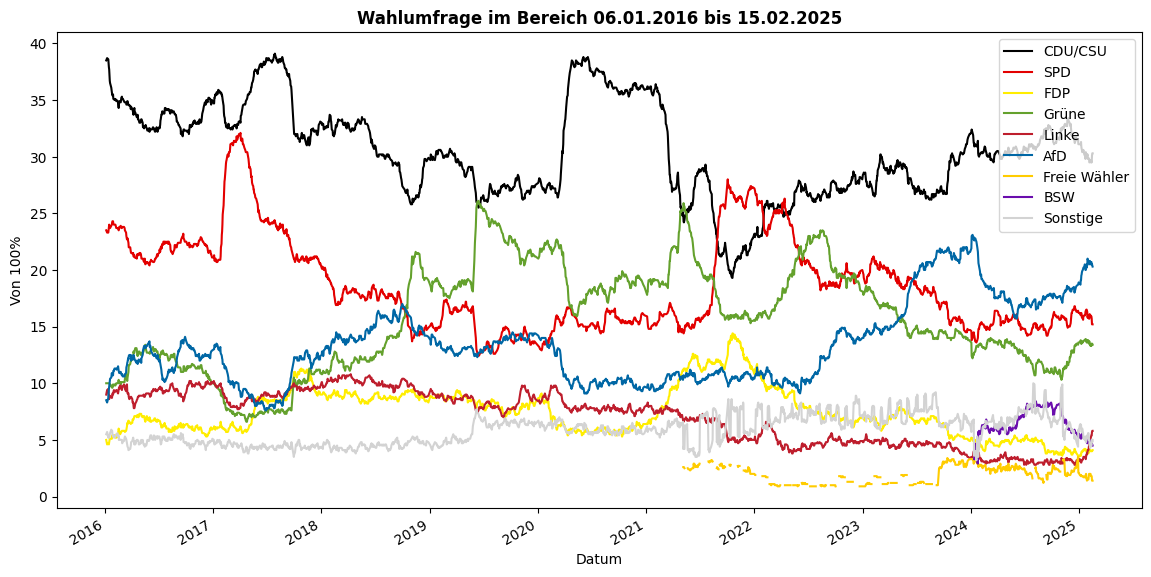

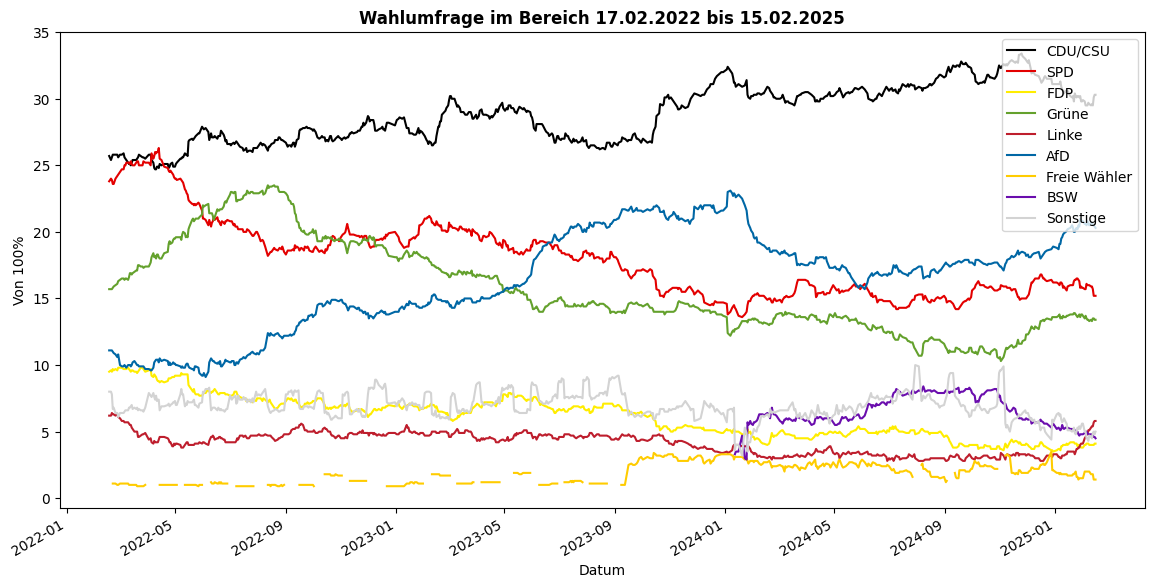

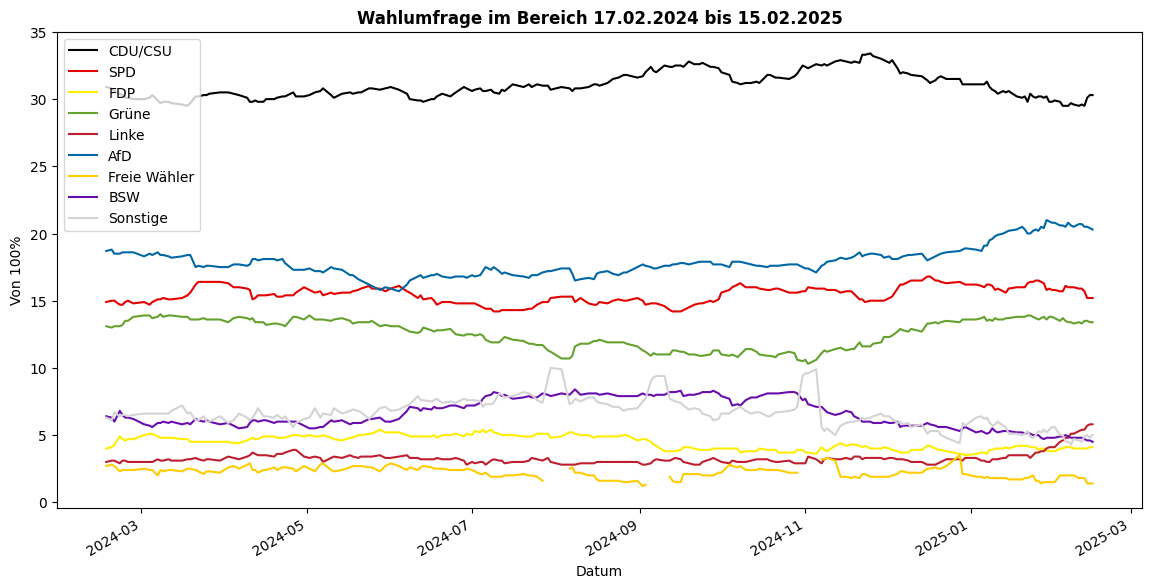

In [89]:
# Ersetze alle 0 zu NaN damit diese nicht im Plot auftauchen
df_with_nan = df.replace(0, np.nan)

# Farbzuweisung für die Parteien
colors = {
    "CDU/CSU": '#000000',  # Schwarz für CDU/CSU
    "SPD":  '#E30000',      # Rot für SPD
    "FDP":  '#FFED00',      # Gelb für FDP
    "Grüne": '#64A12D',     # Grün für Grüne
    "Linke": '#BE1E2D',     # Dunkelrot für Die Linke
    "AfD": '#0067A5',       # Blau für AfD
    "Freie Wähler": '#FFCC00',  # Gelb für Freie Wähler
    "BSW": '#6A0DAD',       # Lila für BSW
    "Sonstige": '#D3D3D3'   # Grau für Sonstige
}

# Liste der Farben basierend auf den Spalten im DataFrame
sorted_colors = [colors[kat] for kat in df.columns]

# ALLE Verfügbaren Jahre
# Diagramm plotten
ax = df_with_nan.plot(kind='line', figsize=(14, 7), color=sorted_colors)

plt.title(f"Wahlumfrage im Bereich {df_with_nan.index[0].strftime('%d.%m.%Y')} bis {df_with_nan.index[-1].strftime('%d.%m.%Y')}", weight="bold")
plt.ylabel("Von 100%")
plt.show()


# LETZTE 3 Jahre
df_with_nan = df_with_nan[df_with_nan.index > pd.to_datetime('today') - pd.DateOffset(years=3)]
ax = df_with_nan.plot(kind='line', figsize=(14, 7), color=sorted_colors)

plt.title(f"Wahlumfrage im Bereich {df_with_nan.index[0].strftime('%d.%m.%Y')} bis {df_with_nan.index[-1].strftime('%d.%m.%Y')}", weight="bold")
plt.ylabel("Von 100%")
plt.show()

# LETZTES Jahr
df_with_nan = df_with_nan[df_with_nan.index > pd.to_datetime('today') - pd.DateOffset(years=1)]
ax = df_with_nan.plot(kind='line', figsize=(14, 7), color=sorted_colors)

plt.title(f"Wahlumfrage im Bereich {df_with_nan.index[0].strftime('%d.%m.%Y')} bis {df_with_nan.index[-1].strftime('%d.%m.%Y')}", weight="bold")
plt.ylabel("Von 100%")
plt.show()

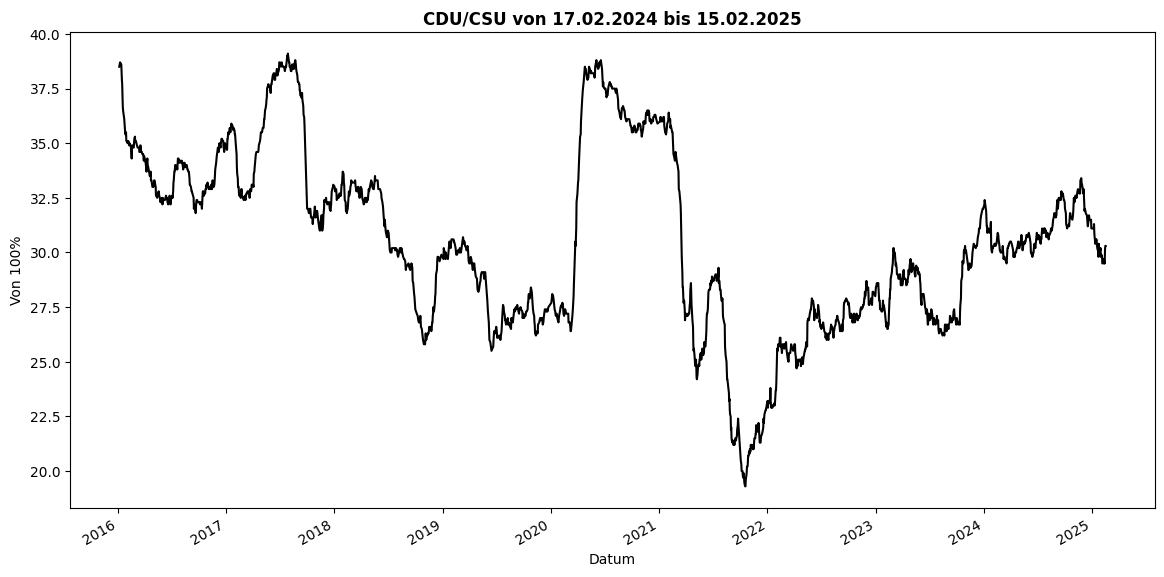

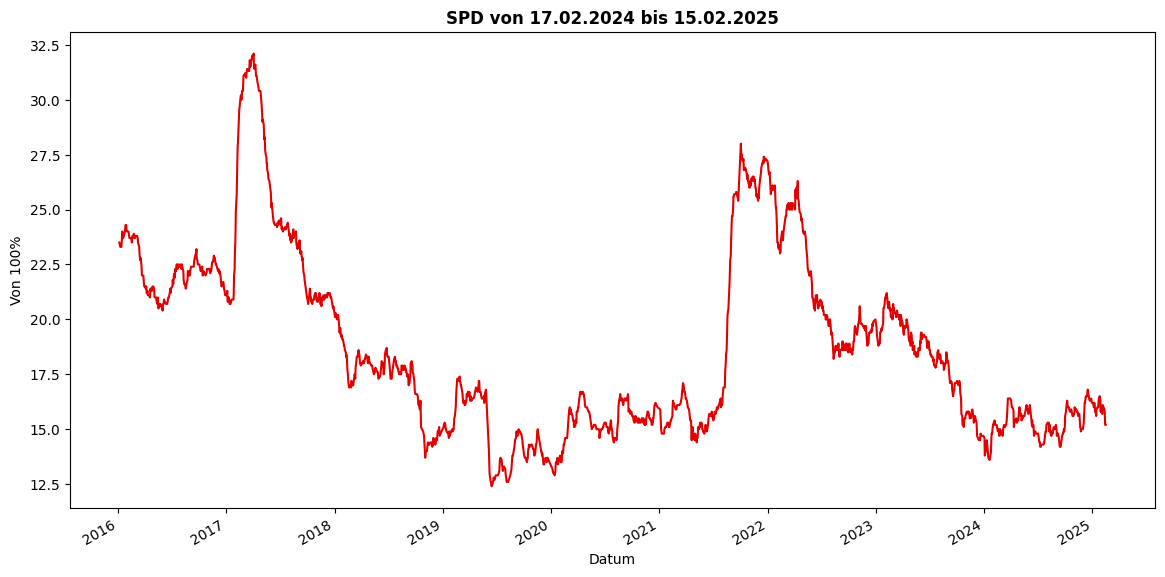

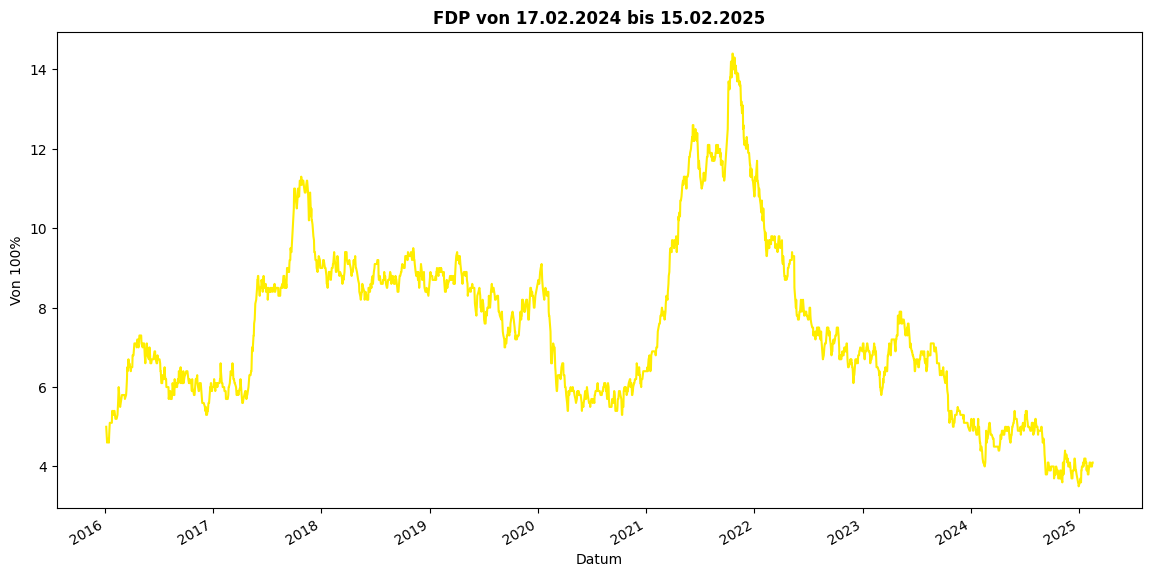

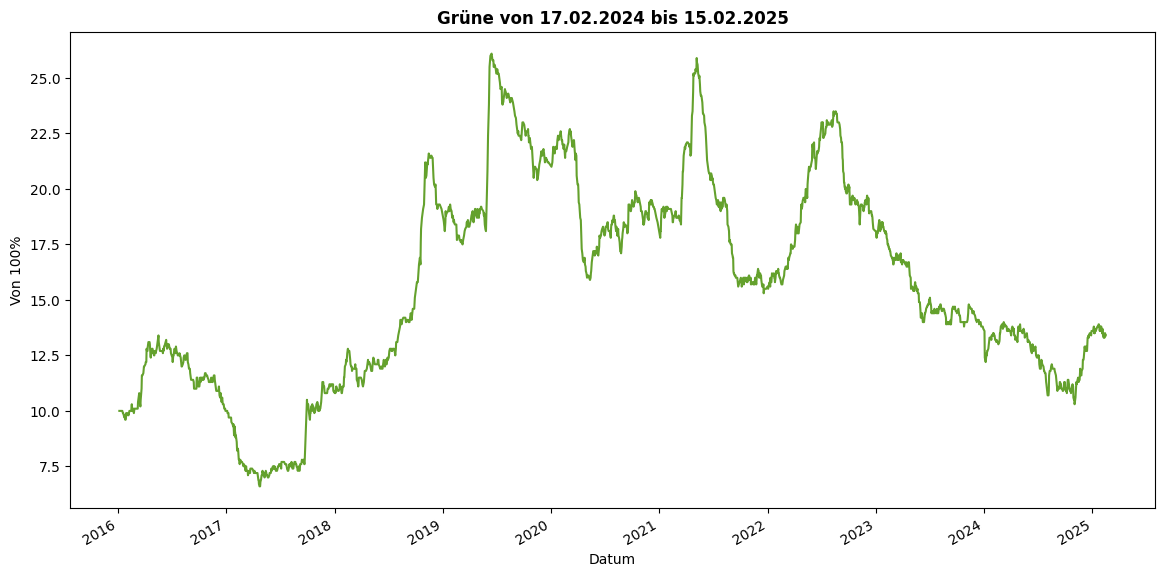

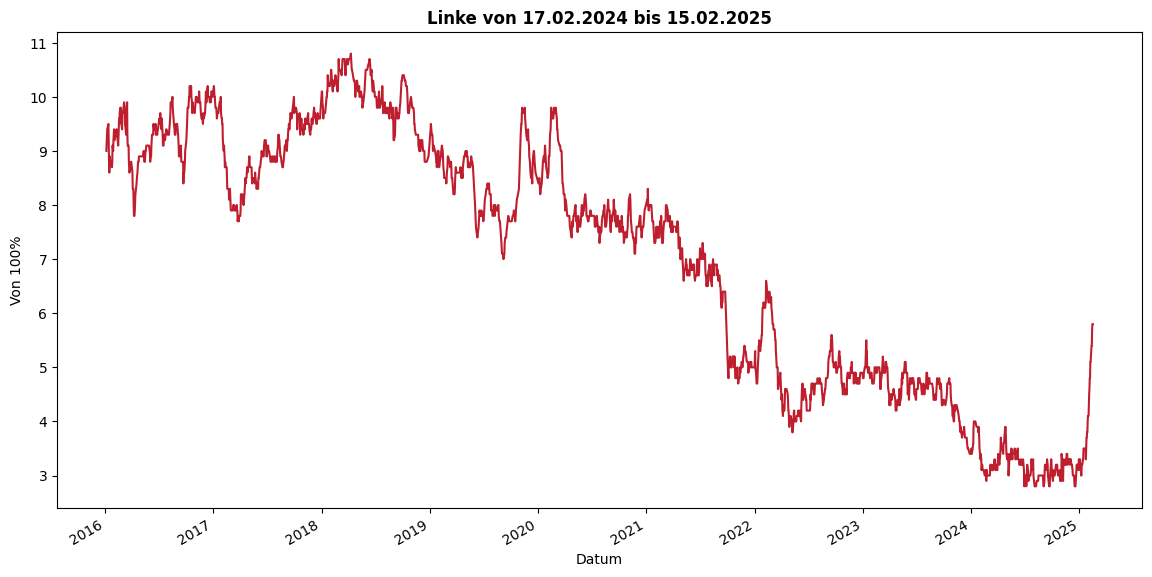

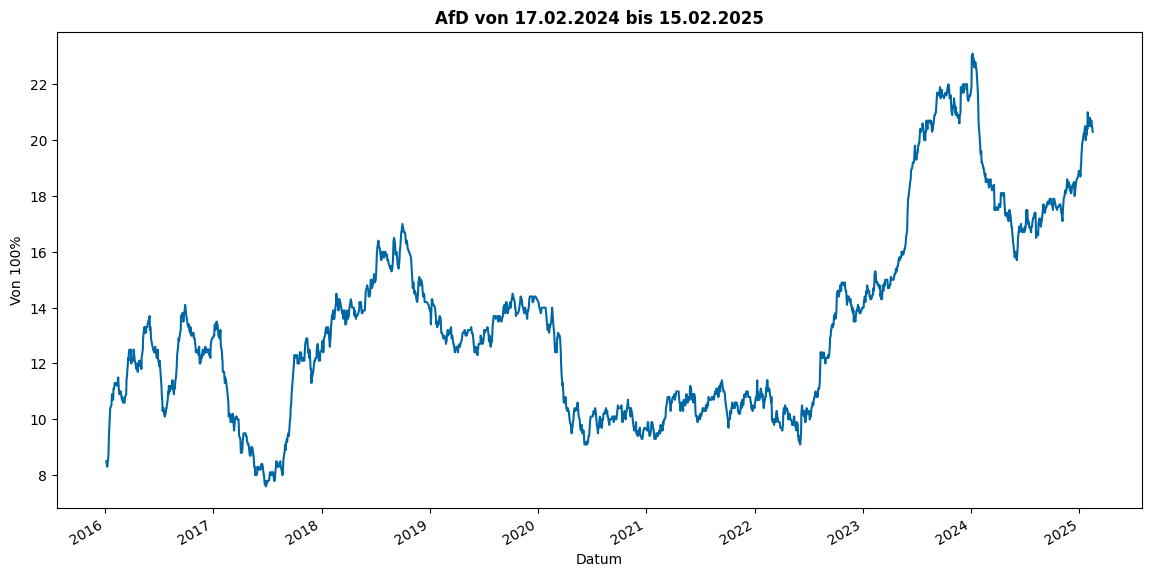

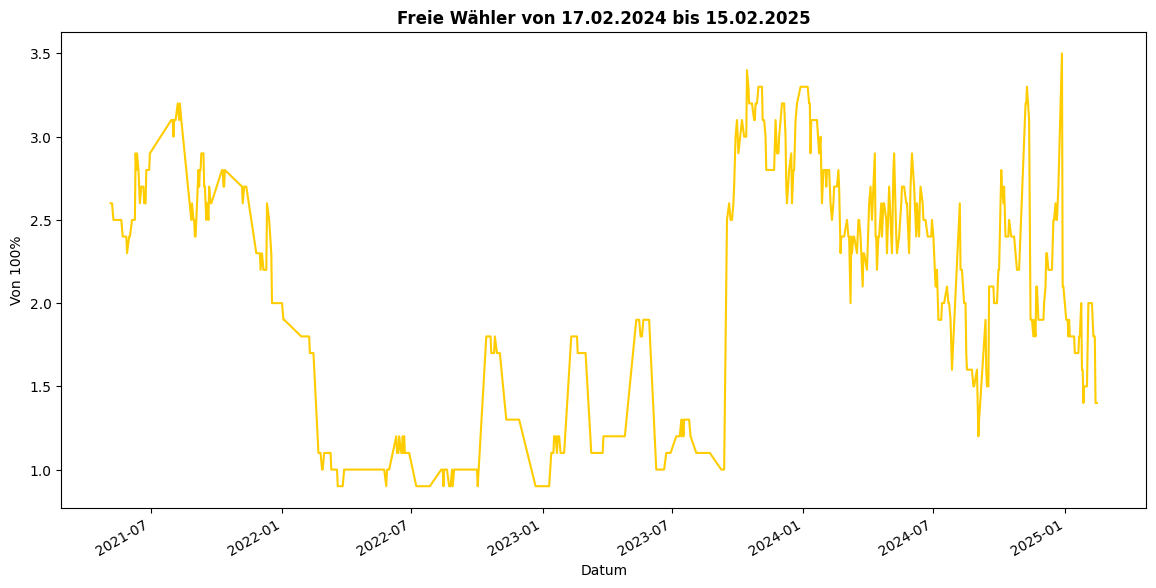

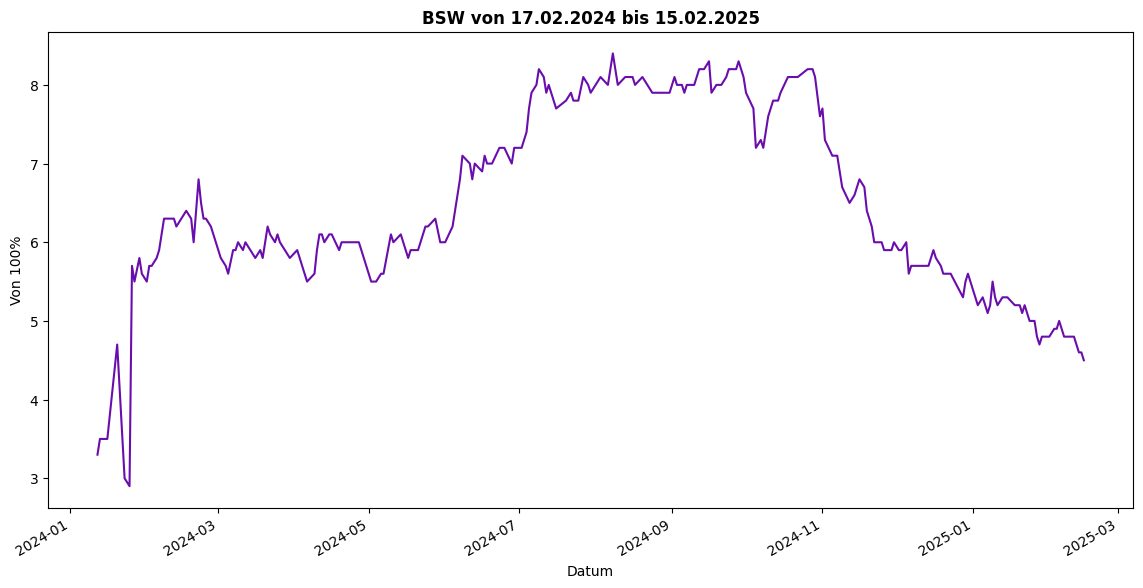

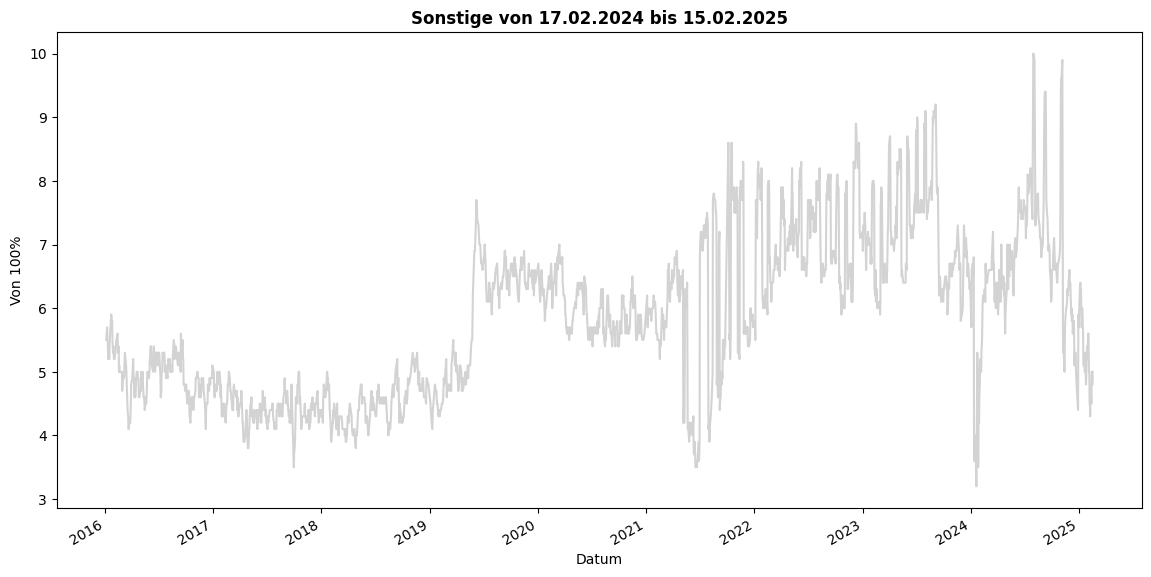

In [91]:
for party in df.columns:
    sorted_colors = colors[party]
    df[party].replace(0, np.nan).dropna(axis=0).plot(kind="line", figsize=(14, 7), color=sorted_colors)

    plt.title(f"{party} von {df_with_nan.index[0].strftime('%d.%m.%Y')} bis {df_with_nan.index[-1].strftime('%d.%m.%Y')}", weight="bold")
    plt.ylabel("Von 100%")
    plt.show()

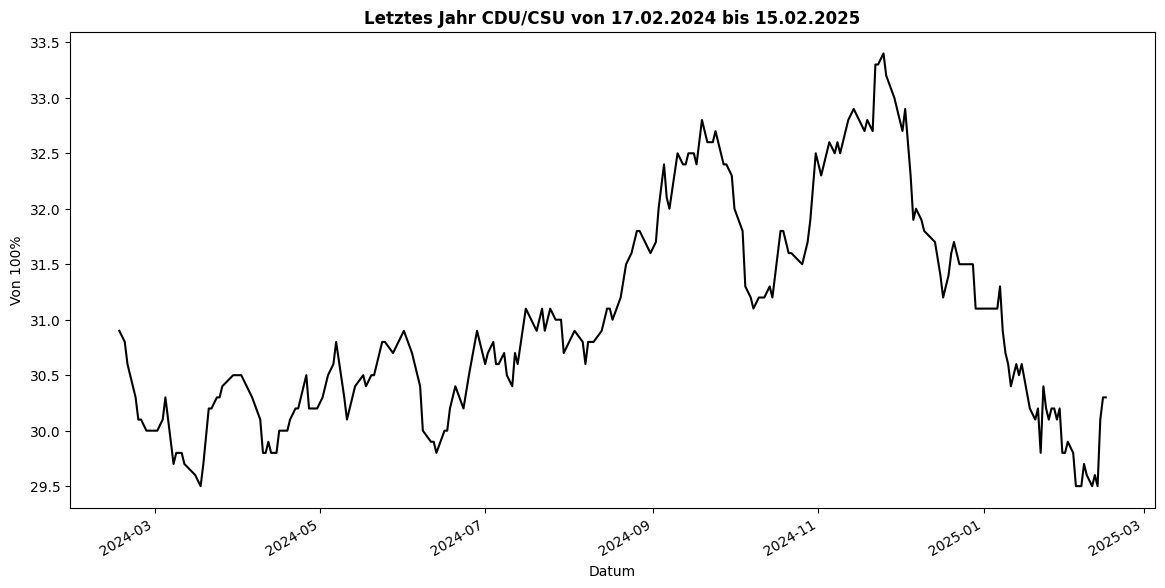

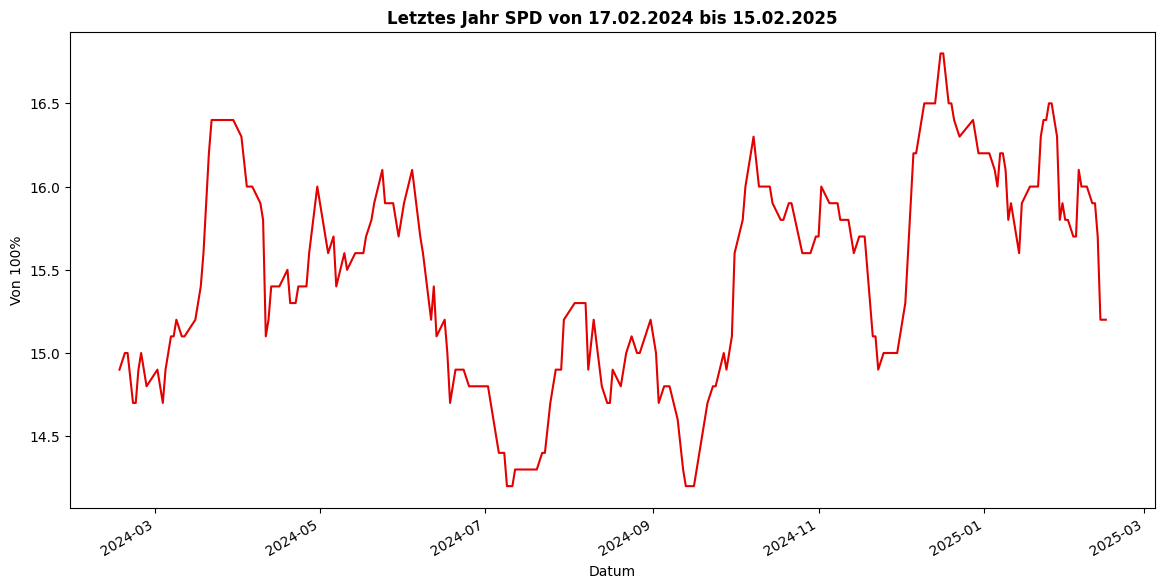

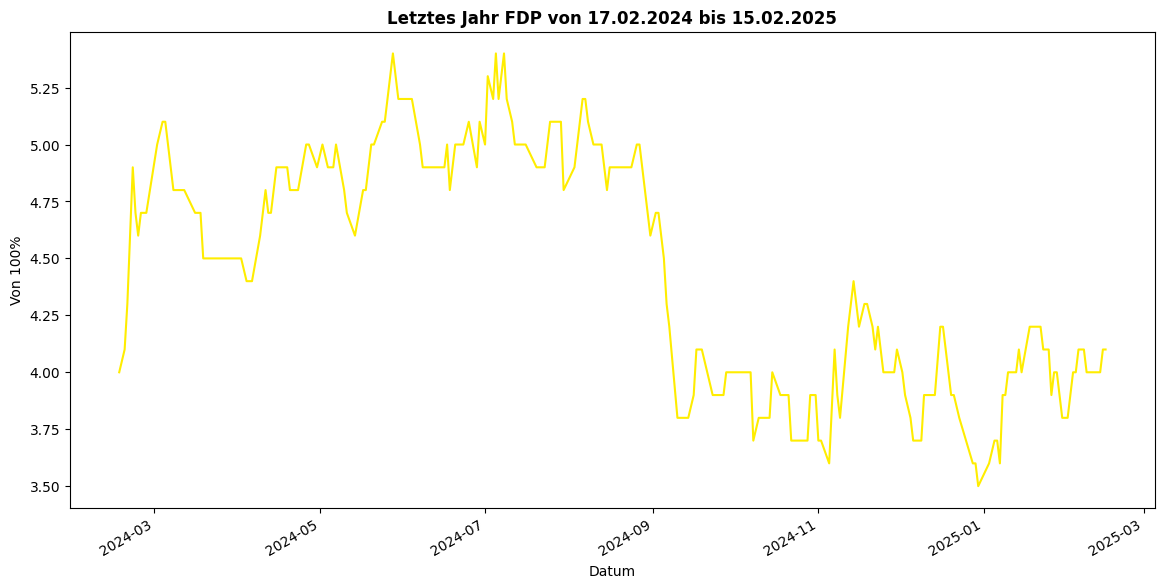

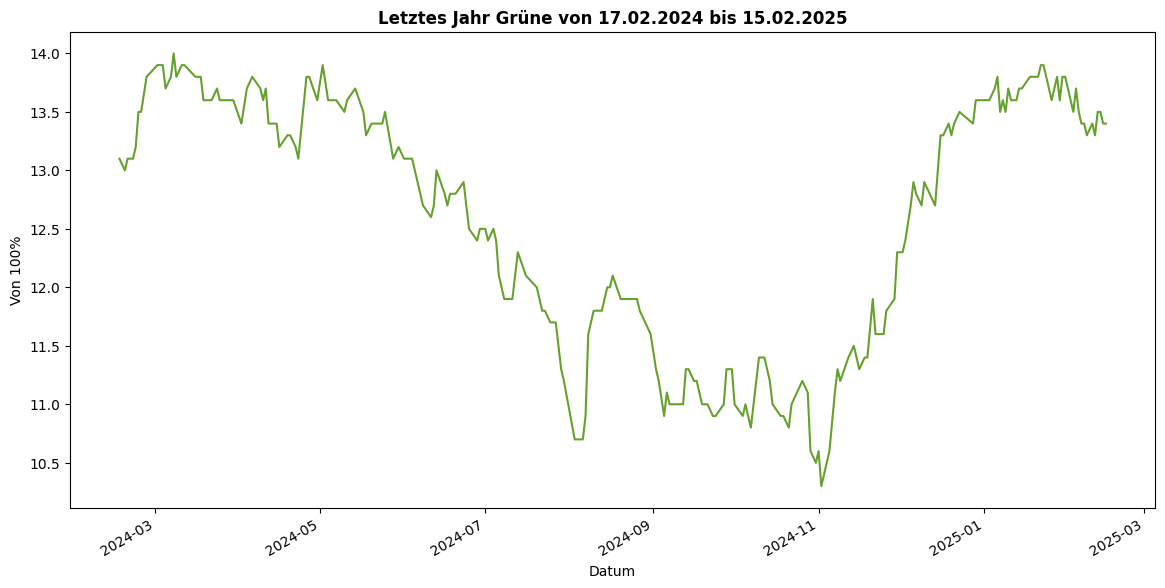

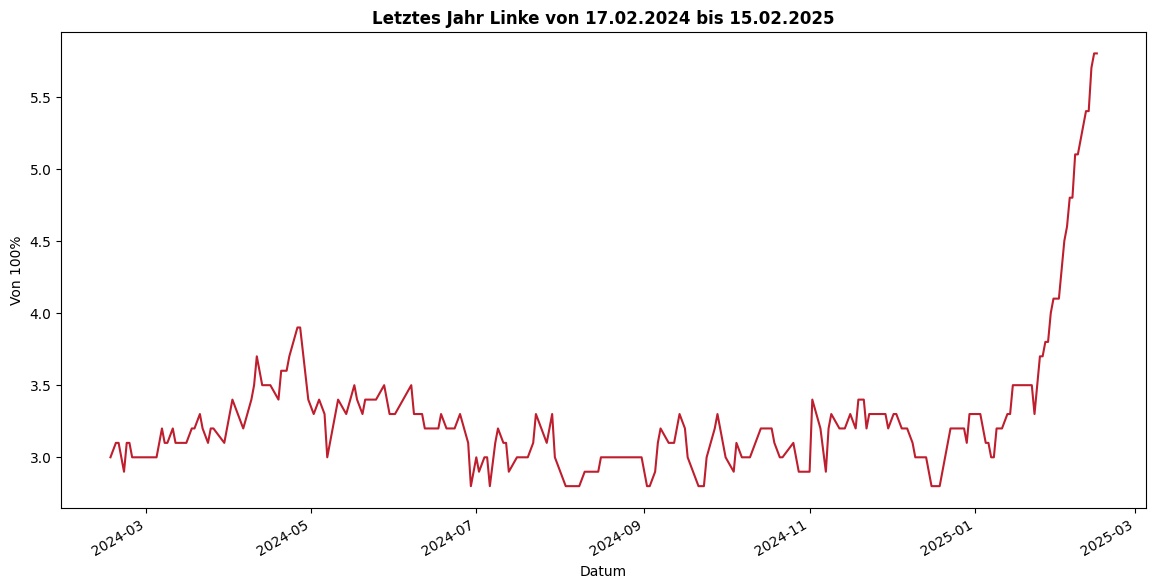

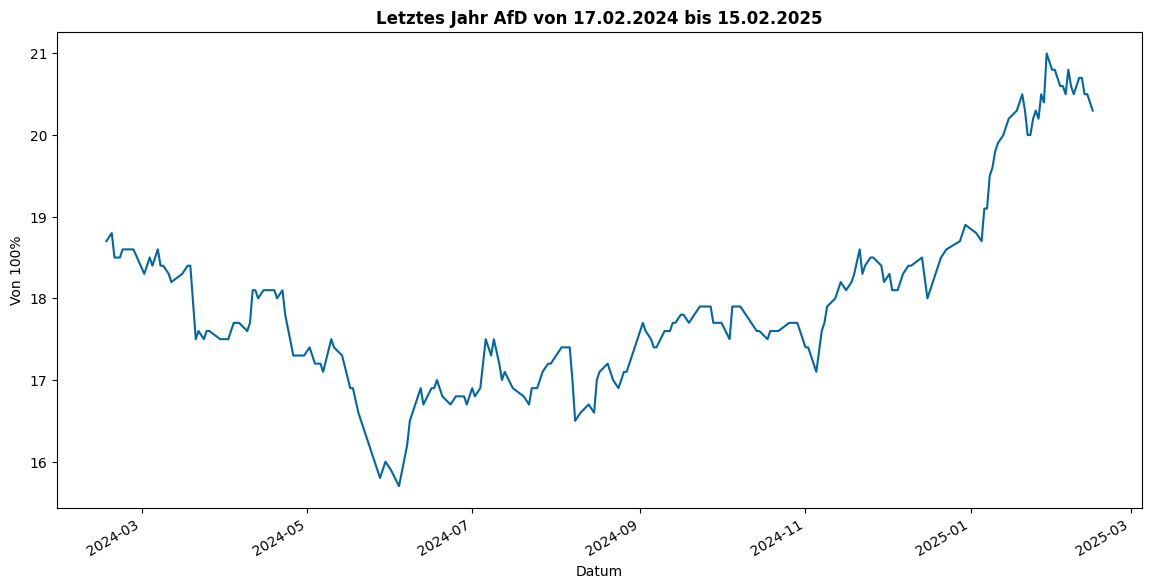

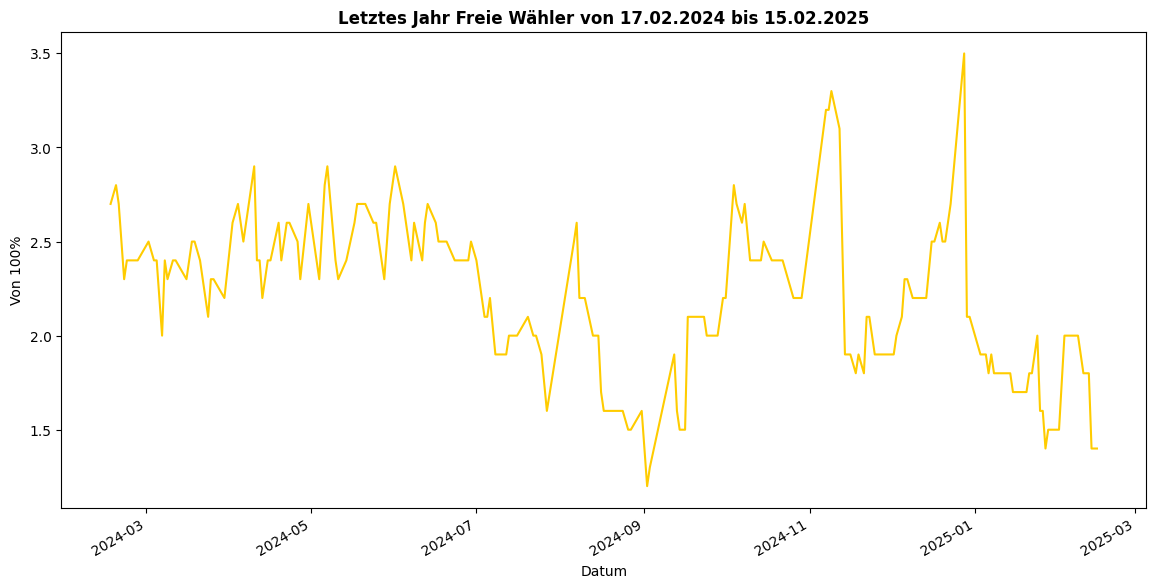

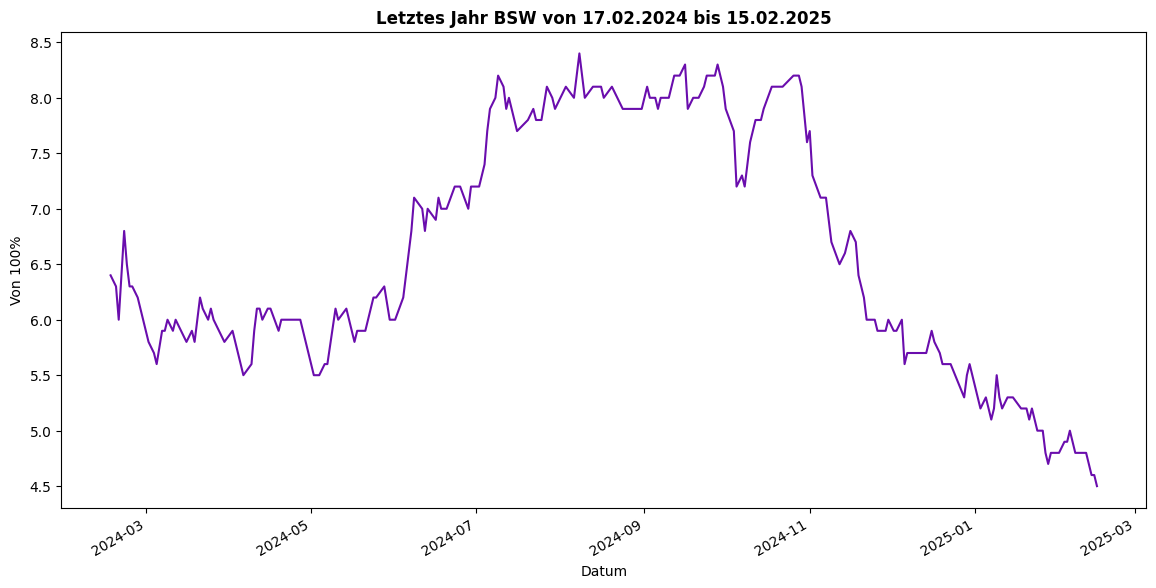

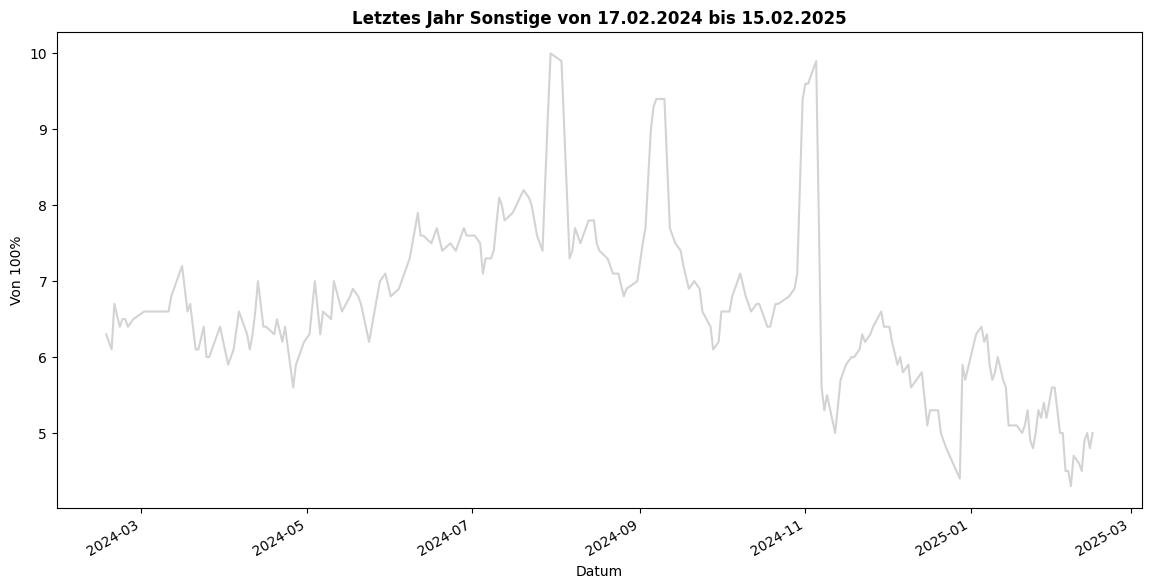

In [93]:
for party in df.columns:
    sorted_colors = colors[party]
    df[party].replace(0, np.nan).dropna(axis=0)[df[party].replace(0, np.nan).dropna(axis=0).index > pd.to_datetime('today') - pd.DateOffset(years=1)] .plot(kind="line", figsize=(14, 7), color=sorted_colors)

    plt.title(f"Letztes Jahr {party} von {df_with_nan.index[0].strftime('%d.%m.%Y')} bis {df_with_nan.index[-1].strftime('%d.%m.%Y')}", weight="bold")
    plt.ylabel("Von 100%")
    plt.show()